In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Generate dataset

In [2]:
from scipy.stats import laplace

In [3]:
loc, scale = 0, 1
n = 10000
x = laplace.rvs(loc=loc, scale=scale, size=n)

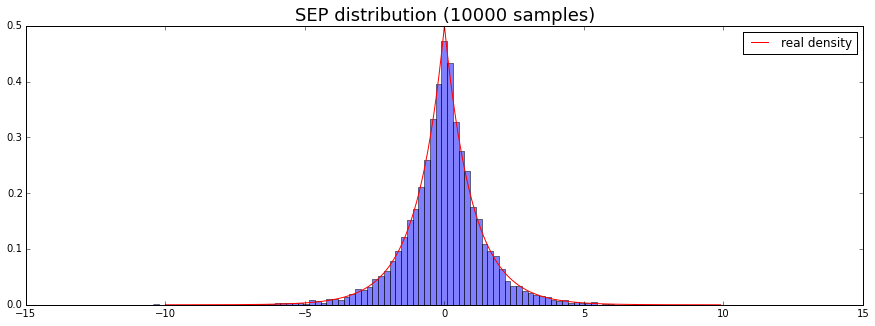

In [4]:
plt.figure(figsize=(15, 5))
plt.hist(x, bins=100, normed=True, alpha=.5)

xx = np.arange(-10, 10, .1)
plt.plot(xx, laplace.pdf(xx, loc=loc, scale=scale), color='red')

plt.legend(['real density'], loc='best')
plt.title('SEP distribution (%s samples)' % n, size=18)
plt.show()

## Estimate

In [5]:
from qmmc import InvGamma, Normal, Laplace, Value
from qmmc import Model

In [6]:
mu_0, sigma_0 = Value(0), Value(2)
shape_0, scale_0 = Value(2), Value(2)

loc_ = Normal(mu_0, sigma_0, name='loc')
scale_ = InvGamma(shape_0, scale_0, name='scale')

x_ = Laplace(loc_, scale_, value=x, observed=True, name='x')

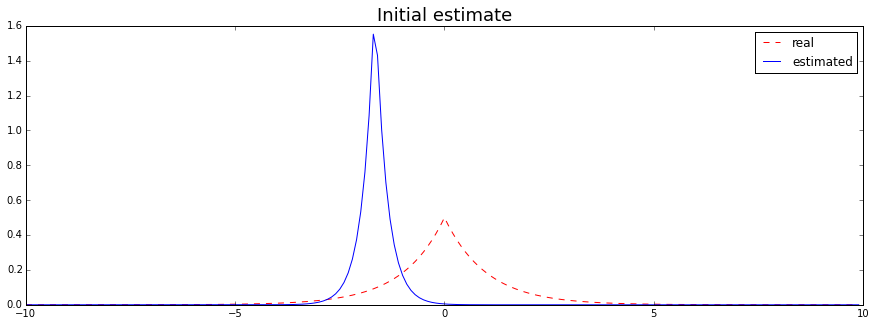

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(xx, laplace.pdf(xx, loc=loc, scale=scale), color='red', linestyle='--')
plt.plot(xx, laplace.pdf(xx, loc=loc_.value, scale=scale_.value), color='blue')
plt.legend(['real', 'estimated'], loc='best')
plt.title("Initial estimate", size=18)
plt.show()

In [8]:
model = Model(variables=[loc_, scale_, x_])

In [9]:
%%time
model.estimate(100)

0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100%
CPU times: user 448 ms, sys: 5.92 ms, total: 454 ms
Wall time: 448 ms


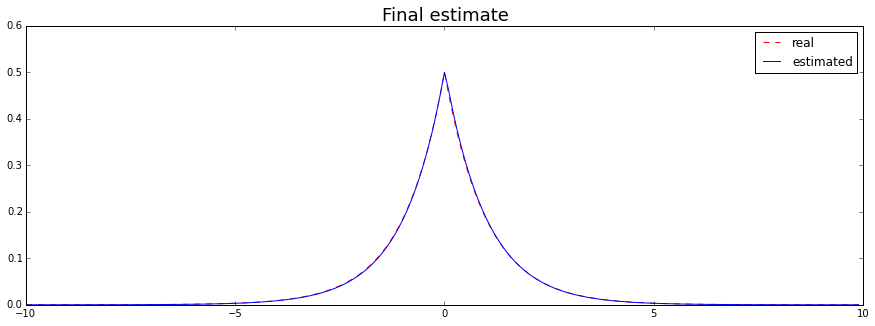

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(xx, laplace.pdf(xx, loc=loc, scale=scale), color='red', linestyle='--')
plt.plot(xx, laplace.pdf(xx, loc=loc_.value, scale=scale_.value), color='blue')
plt.legend(['real', 'estimated'], loc='best')
plt.title("Final estimate", size=18)
plt.show()

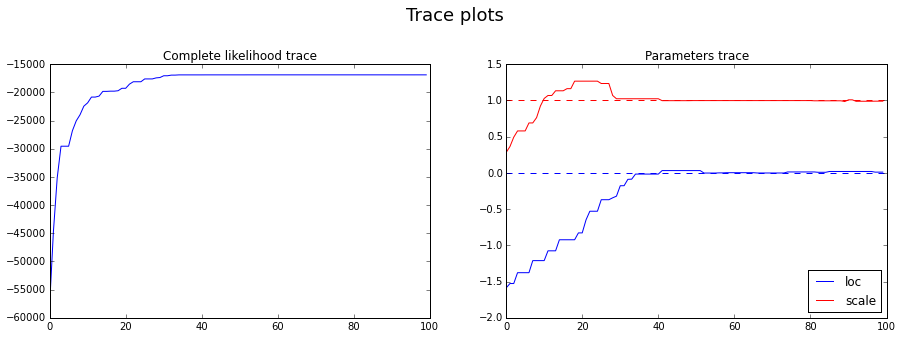

In [11]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(model.logp_hist)
plt.title('Complete likelihood trace')

plt.subplot(2, 2, 2)
plt.plot(model.samplers['loc'].get_history(), color='b')
plt.plot(model.samplers['scale'].get_history(), color='r')

plt.axhline(loc, color='b', linestyle='--')
plt.axhline(scale, color='r', linestyle='--')
plt.title('Parameters trace')

plt.legend(['loc', 'scale'], loc='best')
plt.suptitle("Trace plots", size=18) 
plt.show()